In [7]:
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

In [35]:
metricsdf = pd.read_csv('merged_dataframe_updated.csv')
print metricsdf.shape
metricsdf.head(3)

(2347, 111)


,Unnamed: 0,Entry_No,Source,DNA_UNIQUE_ID,DNA_Designation,DNA_Accno_source,IRGC_Number,DNA_VARNAME_source,DNA_Othername_source,ORI_COUNTRY,Unnamed: 8,Genetic_Stock_Accno,Genetic_stock_Designation(varname),total seq count,passed qc seq count,depth,Variety Group (Tree)1,acc_date,acc_id_seed_donor_number,acc_id_seq_num,alkali_tolerance,altitude,apiculus_color,apiculus_color_post_harv,auricle_color,awn_color,awn_presence,bacterial_blight,basal_color,blade_color,blade_pub,blast,cold_tolerance,collar_color,collection_number,culm_angle,culm_diam,culm_length,culm_num,culm_strength,cultural_type,days_to_flower,days_to_head,days_to_mat,days_to_maturity,district,donor_country,drought_1,drought_2,drought_3,...,flat_leaf_angle,flood_tolerance,grain_len,grain_wid,internode_color,latitude,leaf_angle,leaf_length,leaf_senescence,leaf_texture,leaf_width,lemma_and_palea_color,lemma_and_palea_pub,lemma_color,lemma_color_at_anthesis,ligule_color,ligule_shape,lingule_pub,longitude,multilateral_system,node_color,panicle,panicle_axis,panicle_exerion,panicle_shattering,panicle_thesability,pedigree,previous_name,province,rice_blast,salt_tolerance,seat_coat_color,secondary_branching,seed_coat_color,seedling_height,sheath_blight,source_country,special_traits,species_name,spikelet_fertility,status,stigma_color,subpopulation,town,tungro_virus,varietal_group,variety_group_from_morph,variety_name,village,zinc_def_1
0,0,65,IRRI,IRIS 313-9783,BERENJ 1277 S::IRGC 3461-1-1,IRGC 3461,3461,BERENJ 1277 S,NaN,AFGHANISTAN,Afghanistan,IRGC 121902,BERENJ 1277 S::IRGC 3461-1,NaN,NaN,NaN,Japonica,NaN,PI 223894,1,X,NaN,X,X,Light green,010,070,NaN,Green,Green,Pubescent,Susceptible,X,Green,NaN,Erect (1),1,1,80,1,NaN,X,NaN,110,110,NaN,UNITED STATES,5,3,X,...,9,X,9,2,7,33,NaN,71-90 cm,9,NaN,2,020,X,1,Weak(most plants nearly flat),Whitish,NaN,Green,67,Yes,NaN,1,020,1,X,5,NaN,NaN,NaN,NaN,X,010,X,Susceptible,Short (,Moderately resistant,AFGHANISTAN,NaN,O. sativa,7,Landrace/Traditional cultivar,3,A,NaN,0,Indica,NaN,BERENJ 1277 S,NaN,X
1,1,1632,IRRI,IRIS 313-10509,AMBARIKORI::IRGC 5132-1,IRGC 5132,5132,AMBARIKORI,NaN,AFRICA,Africa,IRGC 127120,AMBARIKORI::IRGC 5132-1,NaN,NaN,NaN,Indica,4/7/1962,NaN,NaN,X,NaN,X,X,Light green,010,010,Susceptible,Green,Green,Pubescent,Resistant,X,Green,NaN,Erect (1),1,2,134,1,NaN,X,NaN,164,164,NaN,PHILIPPINES,5,5,X,...,9,X,8,2,1,-33,NaN,131-150 cm,9,NaN,3,054,X,2,Strong(no lodging),Whitish,NaN,Green,26,Yes,NaN,1,000,0,X,5,NaN,NaN,NaN,Susceptible,X,010,X,Resistant,Intermediate (30-59 cm),NaN,AFRICA,NaN,O. sativa,3,NaN,4,A,NaN,93,Indica,NaN,AMBARIKORI,NaN,X
2,3,363,IRRI,IRIS 313-9778,GENIT::IRGC 3272-1-1,IRGC 3272,3272,GENIT,NaN,ARGENTINA,Argentina,IRGC 125751,GENIT::IRGC 3272-1,66457214,60982350,12.7,Indica,NaN,PI 238490,1,X,NaN,X,X,Light green,010,010,NaN,Green,Green,Pubescent,Susceptible,X,Green,NaN,Erect (1),1,2,89,1,NaN,X,NaN,119,119,NaN,UNITED STATES,1,3,X,...,9,X,8,3,1,-38,NaN,111-130 cm,9,NaN,3,020,X,2,Strong(no lodging),Whitish,NaN,Green,-63,Yes,NaN,1,000,0,X,1,NaN,NaN,NaN,NaN,X,070,X,Susceptible,Short (,NaN,ARGENTINA,NaN,O. sativa,5,Breeding and inbred line,3,A,NaN,0,Indica,NaN,GENIT,NaN,X


In [36]:
metricsdf = metricsdf.drop(685)

In [37]:
metricsdf = metricsdf.drop_duplicates('DNA_UNIQUE_ID')

In [ ]:
metricsdf.to_csv("pheontype_metrics.csv")

In [47]:
metricsdf=pd.read_csv("mat_df.csv", index_col=0)

In [48]:
metricsdf.head()

,DNA_UNIQUE_ID,Variety Group (Tree)1,days_to_mat,source_country,rice_blast,fast,stdardized_mat,z_score
0,IRIS 313-9783,Japonica,110,AFGHANISTAN,NaN,False,-0.910445,-0.899119
1,IRIS 313-10509,Indica,164,AFRICA,Susceptible,False,1.329374,1.313903
2,IRIS 313-9778,Indica,119,ARGENTINA,NaN,False,-0.537142,-0.530282
3,IRIS 313-9980,Japonica,110,ARGENTINA,NaN,False,-0.910445,-0.899119
4,IRIS 313-9795,Indica,135,AUSTRALIA,Susceptible,False,0.126508,0.125428


In [54]:
snpdf = pd.read_csv('../SNP_Data/snps1.csv', index_col=0)
snpdf.shape

(50000, 3023)

In [55]:
snpdf.head(2)

,B001_B001,B002_B002,B003_B003,B004_B004,B005_B005,B006_B006,B007_B007,B008_B008,B009_B009,B010_B010,B011_B011,B012_B012,B013_B013,B014_B014,B015_B015,B016_B016,B017_B017,B018_B018,B019_B019,B020_B020,B021_B021,B023_B023,B024_B024,B025_B025,B026_B026,B027_B027,B028_B028,B029_B029,B030_B030,B031_B031,B032_B032,B033_B033,B034_B034,B035_B035,B036_B036,B037_B037,B038_B038,B039_B039,B040_B040,B043_B043,B044_B044,B045_B045,B046_B046,B047_B047,B048_B048,B049_B049,B051_B051,B052_B052,B053_B053,B054_B054,...,IRIS_313-9822_IRIS_313-9822,IRIS_313-9825_IRIS_313-9825,IRIS_313-9831_IRIS_313-9831,IRIS_313-9832_IRIS_313-9832,IRIS_313-9838_IRIS_313-9838,IRIS_313-9839_IRIS_313-9839,IRIS_313-9841_IRIS_313-9841,IRIS_313-9851_IRIS_313-9851,IRIS_313-9861_IRIS_313-9861,IRIS_313-9862_IRIS_313-9862,IRIS_313-9867_IRIS_313-9867,IRIS_313-9880_IRIS_313-9880,IRIS_313-9882_IRIS_313-9882,IRIS_313-9884_IRIS_313-9884,IRIS_313-9886_IRIS_313-9886,IRIS_313-9887_IRIS_313-9887,IRIS_313-9890_IRIS_313-9890,IRIS_313-9891_IRIS_313-9891,IRIS_313-9897_IRIS_313-9897,IRIS_313-9898_IRIS_313-9898,IRIS_313-9917_IRIS_313-9917,IRIS_313-9922_IRIS_313-9922,IRIS_313-9924_IRIS_313-9924,IRIS_313-9925_IRIS_313-9925,IRIS_313-9926_IRIS_313-9926,IRIS_313-9928_IRIS_313-9928,IRIS_313-9929_IRIS_313-9929,IRIS_313-9935_IRIS_313-9935,IRIS_313-9936_IRIS_313-9936,IRIS_313-9937_IRIS_313-9937,IRIS_313-9939_IRIS_313-9939,IRIS_313-9940_IRIS_313-9940,IRIS_313-9944_IRIS_313-9944,IRIS_313-9949_IRIS_313-9949,IRIS_313-9953_IRIS_313-9953,IRIS_313-9961_IRIS_313-9961,IRIS_313-9963_IRIS_313-9963,IRIS_313-9964_IRIS_313-9964,IRIS_313-9966_IRIS_313-9966,IRIS_313-9968_IRIS_313-9968,IRIS_313-9969_IRIS_313-9969,IRIS_313-9970_IRIS_313-9970,IRIS_313-9974_IRIS_313-9974,IRIS_313-9976_IRIS_313-9976,IRIS_313-9978_IRIS_313-9978,IRIS_313-9980_IRIS_313-9980,IRIS_313-9986_IRIS_313-9986,IRIS_313-9989_IRIS_313-9989,IRIS_313-9995_IRIS_313-9995,IRIS_313-9996_IRIS_313-9996
1_1203,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,1/1,1/1,1/1,NaN,0/0,0/0,1/1,0/0,0/0,0/0,0/0,0/0,1/1,0/0,0/0,0/0,1/1,0/0,1/1,NaN,NaN,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,NaN,1/1,0/0,0/0,0/0,0/0,0/0,0/0,1/1,0/0,0/0,0/1,NaN,...,0/0,0/0,1/1,1/1,0/0,0/0,0/0,0/0,1/1,1/1,0/0,0/0,1/1,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,NaN,0/0,NaN,0/0,0/0,0/0,0/0,1/1,0/0,0/0,0/0,1/1,0/0,0/0,1/1,1/1,1/1,0/0,1/1,NaN,0/0,0/0,0/0,0/0,0/0
1_1248,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,...,0/0,0/0,0/0,NaN,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,NaN,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0


In [56]:
snpdf=snpdf.transpose()

In [57]:
snpdf.head()

,1_1203,1_1248,1_1282,1_1299,1_1787,1_1977,1_2097,1_2245,1_6634,1_11241,1_11297,1_11334,1_11664,1_11835,1_12127,1_13894,1_16737,1_17263,1_21546,1_25777,1_26602,1_27188,1_28781,1_31071,1_34721,1_34729,1_35239,1_35405,1_37676,1_41342,1_42752,1_44681,1_44754,1_44787,1_44826,1_45212,1_46705,1_47171,1_47628,1_47674,1_48241,1_48318,1_48321,1_48402,1_48404,1_48494,1_48633,1_48645,1_48659,1_48681,...,1_20869183,1_20869913,1_20869917,1_20869919,1_20869932,1_20869944,1_20869953,1_20870013,1_20870016,1_20870056,1_20870240,1_20870277,1_20870286,1_20870301,1_20870393,1_20870443,1_20870445,1_20870516,1_20870526,1_20870734,1_20870820,1_20870906,1_20871034,1_20871251,1_20871328,1_20871330,1_20871400,1_20871438,1_20871446,1_20871479,1_20871594,1_20871619,1_20871926,1_20872038,1_20872049,1_20872151,1_20872373,1_20872408,1_20872419,1_20872473,1_20872507,1_20872544,1_20872579,1_20872592,1_20872593,1_20875310,1_20876423,1_20876585,1_20877079,1_20877082
B001_B001,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,1/1,0/1,0/0,0/0,0/0,0/0,NaN,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,...,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/1,0/0,0/1,NaN,0/1,0/1,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/1,0/0,0/0,0/0,0/1,0/0,0/0,NaN,0/0,NaN,0/1,0/0,0/0,0/0,0/0,0/0,0/1,0/0,0/1,0/0,0/0,0/0,0/0,0/0,0/0
B002_B002,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,NaN,0/0,0/0,0/0,0/1,0/1,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,1/1,0/0,0/0,1/1,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,...,0/0,0/0,0/0,0/0,0/0,0/0,0/0,NaN,0/0,NaN,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,NaN,0/0,0/0,1/1,0/0,0/0,1/1,0/0,0/0,1/1,0/0,0/0,0/0,0/0,0/0,1/1,0/0,1/1,0/0,0/0,0/0,0/0,0/0,0/0
B003_B003,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/1,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,...,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/1,NaN,0/0,0/0,0/1,0/1,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/1,0/0,0/0,0/0,0/1,0/0,0/1,0/0,0/0,0/1,0/0,0/0,0/1,0/0,0/0,0/1,0/1,0/0,0/0,0/0,0/0,0/1,0/0,0/1,0/0,0/0,0/0,0/0,0/0,0/0
B004_B004,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,1/1,1/1,0/0,0/0,0/0,0/0,1/1,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,...,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/1,0/0,0/1,0/1,0/1,0/1,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,1/1,0/0,0/0,1/1,0/0,0/0,0/1,0/0,0/0,0/0,0/0,0/0,0/1,0/0,0/1,0/0,0/0,0/0,0/0,0/0,0/0
B005_B005,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,1/1,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,...,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,1/1,0/0,0/0,1/1,0/0,0/0,1/1,0/0,0/0,NaN,0/0,0/0,1/1,0/0,1/1,0/0,0/0,0/0,0/0,0/0,0/0


In [58]:
%%time
select  = list(snpdf.index)
ARRAY=[]
for name in select:
    if name[:4]=='IRIS':
        und=0
        i=0
        for c in name:
            if c=='_':
                und+=1
            if und==2:
                upd_name=name[:i]
                upd_name=upd_name.replace('_', ' ')
                if upd_name in list(metricsdf.DNA_UNIQUE_ID):
                    ARRAY.append(upd_name)
                else:
                    ARRAY.append(name)
                break
            i+=1
    else:
        ARRAY.append(name)

CPU times: user 259 ms, sys: 18.5 ms, total: 277 ms
Wall time: 265 ms


In [59]:
snpdf['index']=ARRAY

In [60]:
snpdf.set_index('index', inplace=True)

In [61]:
snpdf.index.name = None

In [62]:
snpdf.head()

,1_1203,1_1248,1_1282,1_1299,1_1787,1_1977,1_2097,1_2245,1_6634,1_11241,1_11297,1_11334,1_11664,1_11835,1_12127,1_13894,1_16737,1_17263,1_21546,1_25777,1_26602,1_27188,1_28781,1_31071,1_34721,1_34729,1_35239,1_35405,1_37676,1_41342,1_42752,1_44681,1_44754,1_44787,1_44826,1_45212,1_46705,1_47171,1_47628,1_47674,1_48241,1_48318,1_48321,1_48402,1_48404,1_48494,1_48633,1_48645,1_48659,1_48681,...,1_20869183,1_20869913,1_20869917,1_20869919,1_20869932,1_20869944,1_20869953,1_20870013,1_20870016,1_20870056,1_20870240,1_20870277,1_20870286,1_20870301,1_20870393,1_20870443,1_20870445,1_20870516,1_20870526,1_20870734,1_20870820,1_20870906,1_20871034,1_20871251,1_20871328,1_20871330,1_20871400,1_20871438,1_20871446,1_20871479,1_20871594,1_20871619,1_20871926,1_20872038,1_20872049,1_20872151,1_20872373,1_20872408,1_20872419,1_20872473,1_20872507,1_20872544,1_20872579,1_20872592,1_20872593,1_20875310,1_20876423,1_20876585,1_20877079,1_20877082
B001_B001,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,1/1,0/1,0/0,0/0,0/0,0/0,NaN,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,...,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/1,0/0,0/1,NaN,0/1,0/1,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/1,0/0,0/0,0/0,0/1,0/0,0/0,NaN,0/0,NaN,0/1,0/0,0/0,0/0,0/0,0/0,0/1,0/0,0/1,0/0,0/0,0/0,0/0,0/0,0/0
B002_B002,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,NaN,0/0,0/0,0/0,0/1,0/1,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,1/1,0/0,0/0,1/1,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,...,0/0,0/0,0/0,0/0,0/0,0/0,0/0,NaN,0/0,NaN,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,NaN,0/0,0/0,1/1,0/0,0/0,1/1,0/0,0/0,1/1,0/0,0/0,0/0,0/0,0/0,1/1,0/0,1/1,0/0,0/0,0/0,0/0,0/0,0/0
B003_B003,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/1,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,...,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/1,NaN,0/0,0/0,0/1,0/1,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/1,0/0,0/0,0/0,0/1,0/0,0/1,0/0,0/0,0/1,0/0,0/0,0/1,0/0,0/0,0/1,0/1,0/0,0/0,0/0,0/0,0/1,0/0,0/1,0/0,0/0,0/0,0/0,0/0,0/0
B004_B004,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,1/1,1/1,0/0,0/0,0/0,0/0,1/1,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,...,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/1,0/0,0/1,0/1,0/1,0/1,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,1/1,0/0,0/0,1/1,0/0,0/0,0/1,0/0,0/0,0/0,0/0,0/0,0/1,0/0,0/1,0/0,0/0,0/0,0/0,0/0,0/0
B005_B005,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,1/1,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,...,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,1/1,0/0,0/0,1/1,0/0,0/0,1/1,0/0,0/0,NaN,0/0,0/0,1/1,0/0,1/1,0/0,0/0,0/0,0/0,0/0,0/0


In [53]:
# %%time
# select  = list(snpdf.index)
# for name in select:
#     if name[:4]=='IRIS':
#         und=0
#         i=0
#         for c in name:
#             if c=='_':
#                 und+=1
#             if und==2:
#                 upd_name=name[:i]
#                 upd_name=upd_name.replace('_', ' ')
#                 if upd_name in list(metricsdf.DNA_UNIQUE_ID):
#                     snpdf=snpdf.rename(index={name:upd_name})
#                 else:
#                     snpdf.drop(name, inplace=True)
#                 break
#             i+=1
#     else:
#         snpdf.drop(name, inplace=True)

KeyboardInterrupt: 

In [63]:
snpdf.to_csv('../snpdf.csv')

In [90]:
snpdf=pd.read_csv('../snpdf.csv', index_col=0)

In [91]:
snpdf=snpdf.transpose()

In [92]:
snpdf = snpdf.replace(['0/0', '0/1', '1/1', np.nan], [0, 1, 2, 0])

In [93]:
# index_uniques = []
# for row in snpdf.iterrows():
#      index_uniques.append(np.bincount(row[1].values))

In [94]:
# snpdf=snpdf.reset_index()

In [95]:
# p_uniques = []
# for i in index_uniques:
#     p0, p1, p2 = 1.0/3, 1.0/3, 1.0/3
#     if len(i) > 2:
#         p0 = float(i[0])/(i[0] + i[1] + i[2])
#         p1 = float(i[1])/(i[0] + i[1] + i[2])
#         p2 = float(i[2])/(i[0] + i[1] + i[2]) 
#     p_uniques.append([p0, p1, p2])

In [96]:
# i=0
# for r in snpdf.index:
#     col_na_vals = np.random.choice(a=[0,1,2], p=p_uniques[r], size=100)
#     j = 0
#     for col in list(snpdf):
#         if snpdf.iloc[r][col]==3:
#             snpdf.set_value(r, col, col_na_vals[j])
#             j += 1
#         if j == 99:
#             j=0
#     if i % 10 == 0:
#         print i
#     i += 1

In [97]:
snpdf.head()

,B001_B001,B002_B002,B003_B003,B004_B004,B005_B005,B006_B006,B007_B007,B008_B008,B009_B009,B010_B010,B011_B011,B012_B012,B013_B013,B014_B014,B015_B015,B016_B016,B017_B017,B018_B018,B019_B019,B020_B020,B021_B021,B023_B023,B024_B024,B025_B025,B026_B026,B027_B027,B028_B028,B029_B029,B030_B030,B031_B031,B032_B032,B033_B033,B034_B034,B035_B035,B036_B036,B037_B037,B038_B038,B039_B039,B040_B040,B043_B043,B044_B044,B045_B045,B046_B046,B047_B047,B048_B048,B049_B049,B051_B051,B052_B052,B053_B053,B054_B054,...,IRIS 313-9822,IRIS 313-9825,IRIS 313-9831,IRIS 313-9832,IRIS 313-9838,IRIS 313-9839,IRIS 313-9841,IRIS 313-9851,IRIS 313-9861,IRIS 313-9862,IRIS 313-9867,IRIS 313-9880,IRIS 313-9882,IRIS 313-9884,IRIS 313-9886,IRIS 313-9887,IRIS 313-9890,IRIS 313-9891,IRIS 313-9897,IRIS 313-9898,IRIS 313-9917,IRIS 313-9922,IRIS 313-9924,IRIS 313-9925,IRIS 313-9926,IRIS 313-9928,IRIS 313-9929,IRIS 313-9935,IRIS 313-9936,IRIS 313-9937,IRIS 313-9939,IRIS 313-9940,IRIS 313-9944,IRIS 313-9949,IRIS 313-9953,IRIS 313-9961,IRIS 313-9963,IRIS 313-9964,IRIS 313-9966,IRIS 313-9968,IRIS 313-9969,IRIS 313-9970,IRIS 313-9974,IRIS 313-9976,IRIS 313-9978,IRIS 313-9980,IRIS 313-9986,IRIS 313-9989,IRIS 313-9995,IRIS 313-9996
1_1203,0,0,0,0,0,0,0,0,2,2,2,0,0,0,2,0,0,0,0,0,2,0,0,0,2,0,2,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,2,0,0,1,0,...,0,0,2,2,0,0,0,0,2,2,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,2,0,0,2,2,2,0,2,0,0,0,0,0,0
1_1248,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1_1282,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1_1299,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0
1_1787,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [98]:
snpdf=snpdf.transpose()

In [100]:
merged_df=pd.merge(left=metricsdf,right=snpdf, left_on='DNA_UNIQUE_ID', right_index=True)
print "Shape: " + str(merged_df.shape);

Shape: (2343, 50008)


In [101]:
merged_df.head()

,DNA_UNIQUE_ID,Variety Group (Tree)1,days_to_mat,source_country,rice_blast,fast,stdardized_mat,z_score,1_1203,1_1248,1_1282,1_1299,1_1787,1_1977,1_2097,1_2245,1_6634,1_11241,1_11297,1_11334,1_11664,1_11835,1_12127,1_13894,1_16737,1_17263,1_21546,1_25777,1_26602,1_27188,1_28781,1_31071,1_34721,1_34729,1_35239,1_35405,1_37676,1_41342,1_42752,1_44681,1_44754,1_44787,1_44826,1_45212,1_46705,1_47171,1_47628,1_47674,1_48241,1_48318,...,1_20869183,1_20869913,1_20869917,1_20869919,1_20869932,1_20869944,1_20869953,1_20870013,1_20870016,1_20870056,1_20870240,1_20870277,1_20870286,1_20870301,1_20870393,1_20870443,1_20870445,1_20870516,1_20870526,1_20870734,1_20870820,1_20870906,1_20871034,1_20871251,1_20871328,1_20871330,1_20871400,1_20871438,1_20871446,1_20871479,1_20871594,1_20871619,1_20871926,1_20872038,1_20872049,1_20872151,1_20872373,1_20872408,1_20872419,1_20872473,1_20872507,1_20872544,1_20872579,1_20872592,1_20872593,1_20875310,1_20876423,1_20876585,1_20877079,1_20877082
0,IRIS 313-9783,Japonica,110,AFGHANISTAN,NaN,False,-0.910445,-0.899119,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,1,1,0,1,1,1,0,0,0,1,2,0,2,0,0,0,0,0,0
1,IRIS 313-10509,Indica,164,AFRICA,Susceptible,False,1.329374,1.313903,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,2,0,1,2,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,1,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0,2,0,0,0,0,0,0,0
2,IRIS 313-9778,Indica,119,ARGENTINA,NaN,False,-0.537142,-0.530282,2,0,0,2,0,0,0,0,0,0,0,2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,2,0,0,0,0,0,...,0,0,0,1,1,0,1,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,1,1,1,1,1,0,0,0,0,1,1,1,0,0,0,2,0,0
3,IRIS 313-9980,Japonica,110,ARGENTINA,NaN,False,-0.910445,-0.899119,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,1,0,0,0,0,1,0,2,1,0,0,0,0,0
4,IRIS 313-9795,Indica,135,AUSTRALIA,Susceptible,False,0.126508,0.125428,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,2,0,0,1,0,1,0,1,1,0,0,0,0,0,0,0,1,0,1,1,0,0,1,0,1,0,0,1,0,1,1,1,1,0,0,0,1,0,2,0,0,0,0,0,0,0


In [103]:
merged_df.set_index('DNA_UNIQUE_ID', inplace=True)

In [104]:
merged_df.drop(['Variety Group (Tree)1', 'source_country', 'rice_blast', 'days_to_mat','stdardized_mat','z_score'], axis=1,inplace=True)

In [106]:
merged_df.head()

,fast,1_1203,1_1248,1_1282,1_1299,1_1787,1_1977,1_2097,1_2245,1_6634,1_11241,1_11297,1_11334,1_11664,1_11835,1_12127,1_13894,1_16737,1_17263,1_21546,1_25777,1_26602,1_27188,1_28781,1_31071,1_34721,1_34729,1_35239,1_35405,1_37676,1_41342,1_42752,1_44681,1_44754,1_44787,1_44826,1_45212,1_46705,1_47171,1_47628,1_47674,1_48241,1_48318,1_48321,1_48402,1_48404,1_48494,1_48633,1_48645,1_48659,...,1_20869183,1_20869913,1_20869917,1_20869919,1_20869932,1_20869944,1_20869953,1_20870013,1_20870016,1_20870056,1_20870240,1_20870277,1_20870286,1_20870301,1_20870393,1_20870443,1_20870445,1_20870516,1_20870526,1_20870734,1_20870820,1_20870906,1_20871034,1_20871251,1_20871328,1_20871330,1_20871400,1_20871438,1_20871446,1_20871479,1_20871594,1_20871619,1_20871926,1_20872038,1_20872049,1_20872151,1_20872373,1_20872408,1_20872419,1_20872473,1_20872507,1_20872544,1_20872579,1_20872592,1_20872593,1_20875310,1_20876423,1_20876585,1_20877079,1_20877082
DNA_UNIQUE_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
IRIS 313-9783,False,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,1,1,0,1,1,1,0,0,0,1,2,0,2,0,0,0,0,0,0
IRIS 313-10509,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,...,0,2,0,1,2,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,1,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0,2,0,0,0,0,0,0,0
IRIS 313-9778,False,2,0,0,2,0,0,0,0,0,0,0,2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,1,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,1,1,1,1,1,0,0,0,0,1,1,1,0,0,0,2,0,0
IRIS 313-9980,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,1,0,0,0,0,1,0,2,1,0,0,0,0,0
IRIS 313-9795,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,2,0,0,1,0,1,0,1,1,0,0,0,0,0,0,0,1,0,1,1,0,0,1,0,1,0,0,1,0,1,1,1,1,0,0,0,1,0,2,0,0,0,0,0,0,0


In [107]:
merged_df.to_csv('../finally.csv')

In [41]:
merged_df=pd.read_csv('../finally.csv', index_col=0)

In [3]:
merged_df[['fast']] = merged_df[['fast']].astype(int)

In [114]:
"""
Function
--------
cv_optimize

Inputs
------
clf : an instance of a scikit-learn classifier
parameters: a parameter grid dictionary thats passed to GridSearchCV (see above)
X: a samples-features matrix in the scikit-learn style
y: the response vectors of 1s and 0s (+ives and -ives)
n_folds: the number of cross-validation folds (default 5)
score_func: a score function we might want to pass (default python None)
   
Returns
-------
The best estimator from the GridSearchCV, after the GridSearchCV has been used to
fit the model.
     
Notes
-----
see do_classify and the code below for an example of how this is used
"""
#your code here
def cv_optimize(clf, parameters, X, y, n_folds=5, score_func=None):
    #create gridsearch
    gs = GridSearchCV(clf, param_grid=parameters, cv=n_folds, scoring=score_func)
    #fit gridsearch to inputed values
    gs.fit(X, y)
    #determine best estimator and return it
    best = gs.best_estimator_
    return best

In [113]:
from sklearn.metrics import confusion_matrix
def do_classify(clf, parameters, indf, featurenames, targetname, target1val, mask=None, reuse_split=None, score_func=None, n_folds=5):
    subdf=indf[featurenames]
    X=subdf.values
    y=(indf[targetname].values==target1val)*1
    if mask !=None:
        print "using mask"
        Xtrain, Xtest, ytrain, ytest = X[mask], X[~mask], y[mask], y[~mask]
    if reuse_split !=None:
        print "using reuse split"
        Xtrain, Xtest, ytrain, ytest = reuse_split['Xtrain'], reuse_split['Xtest'], reuse_split['ytrain'], reuse_split['ytest']
    if parameters:
        clf = cv_optimize(clf, parameters, Xtrain, ytrain, n_folds=n_folds, score_func=score_func)
    clf=clf.fit(Xtrain, ytrain)
    training_accuracy = clf.score(Xtrain, ytrain)
    test_accuracy = clf.score(Xtest, ytest)
    print "############# based on standard predict ################"
    print "Accuracy on training data: %0.4f" % (training_accuracy)
    print "Accuracy on test data:     %0.4f" % (test_accuracy)
    print confusion_matrix(ytest, clf.predict(Xtest))
    print "########################################################"
    return clf, Xtrain, ytrain, Xtest, ytest

In [44]:
lcols=list(merged_df)
lcols.remove('fast')

In [112]:
from sklearn.cross_validation import train_test_split



In [46]:

itrain, itest = train_test_split(xrange(merged_df.shape[0]), train_size=0.7)
mask=np.ones(merged_df.shape[0], dtype='int')
mask[itrain]=1
mask[itest]=0
mask = (mask==1)
mask.shape, mask.sum()

((2343,), 1640)

In [111]:
from sklearn.grid_search import GridSearchCV
from sklearn.linear_model import LogisticRegression

In [11]:

#train classifier
clflog, Xtrain, ytrain, Xtest, ytest = do_classify(LogisticRegression(penalty="l1"), {"C": [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]}, merged_df,lcols, 'fast',1, mask=mask)

using mask
############# based on standard predict ################
Accuracy on training data: 0.8530
Accuracy on test data:     0.8393
[[590   0]
 [113   0]]
########################################################


/Users/oneil/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:6: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.


In [50]:
dict(zip(merged_df.columns.values[1:],clflog.coef_[0]))

{'1_19637196': 0.0,
 '1_13034064': 0.0,
 '1_1103361': 0.0,
 '1_18350679': 0.0,
 '1_20552786': 0.0,
 '1_16949536': 0.0,
 '1_16949538': 0.0,
 '1_907454': 0.0,
 '1_4712435': 0.0,
 '1_621122': 0.0,
 '1_4316589': 0.0,
 '1_12516387': 0.0,
 '1_4712911': 0.0,
 '1_19231479': 0.0,
 '1_8876541': 0.0,
 '1_9052989': 0.0,
 '1_9835356': 0.0,
 '1_951830': 0.0,
 '1_6351487': 0.0,
 '1_17662276': 0.0,
 '1_12544407': 0.0,
 '1_247454': 0.0,
 '1_4284553': 0.0,
 '1_20857803': 0.0,
 '1_4809571': 0.0,
 '1_15191290': 0.0,
 '1_11406704': 0.0,
 '1_15191293': 0.0,
 '1_13383497': 0.0,
 '1_13263585': 0.0,
 '1_20263065': 0.0,
 '1_6298212': 0.0,
 '1_14881976': 0.0,
 '1_5833559': 0.0,
 '1_13969038': 0.0,
 '1_17872445': 0.0,
 '1_3436818': 0.0,
 '1_16238896': 0.0,
 '1_20073162': 0.0,
 '1_8512906': 0.0,
 '1_8512907': 0.0,
 '1_14521555': 0.0,
 '1_19734112': 0.0,
 '1_11314629': 0.0,
 '1_16557768': 0.0,
 '1_18735127': 0.0,
 '1_6645848': 0.0,
 '1_17904366': 0.0,
 '1_18735129': 0.0,
 '1_14556677': 0.0,
 '1_12134314': 0.0,
 '1_

In [109]:
from scipy.stats.stats import spearmanr

In [110]:
from sklearn.svm import LinearSVC

In [50]:

clfsvm, Xtrain, ytrain, Xtest, ytest = do_classify(LinearSVC(loss="hinge"), {"C": [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]}, merged_df,lcols, 'fast',1, mask=mask)

using mask
############# based on standard predict ################
Accuracy on training data: 1.0000
Accuracy on test data:     0.8919
[[574  20]
 [ 56  53]]
########################################################


/Users/oneil/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:6: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.


In [52]:
cor_dict=dict(zip(merged_df.columns.values[1:],clfsvm.coef_[0]))

In [53]:
dir(clfsvm)

['C',
 '__class__',
 '__delattr__',
 '__dict__',
 '__doc__',
 '__format__',
 '__getattribute__',
 '__hash__',
 '__init__',
 '__module__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_get_param_names',
 '_predict_proba_lr',
 'class_weight',
 'classes_',
 'coef_',
 'decision_function',
 'densify',
 'dual',
 'fit',
 'fit_intercept',
 'fit_transform',
 'get_params',
 'intercept_',
 'intercept_scaling',
 'loss',
 'max_iter',
 'multi_class',
 'n_iter_',
 'penalty',
 'predict',
 'random_state',
 'score',
 'set_params',
 'sparsify',
 'tol',
 'transform',
 'verbose']

In [59]:
cor_dict

{'1_19637196': 0.0024472966075540785,
 '1_13034064': -8.3838012475069459e-05,
 '1_1103361': -0.0029615730835474453,
 '1_18350679': 0.0014386743017788255,
 '1_20552786': 0.0045016448360028641,
 '1_16949536': 0.00086391314305213709,
 '1_16949538': 0.00086391567523497377,
 '1_907454': -0.0033606104118421376,
 '1_4712435': -0.001403557219605385,
 '1_621122': -0.0038368598689061417,
 '1_4316589': -0.0014891304027415293,
 '1_12516387': -0.00015263646348882465,
 '1_4712911': -0.0014030400613660643,
 '1_19231479': 0.0019933926244603294,
 '1_8876541': -0.00073514956985562205,
 '1_9052989': -0.00072495271784797828,
 '1_9835356': -0.00061883160578300321,
 '1_951830': -0.0031794952872176044,
 '1_6351487': -0.0011008902683122812,
 '1_17662276': 0.0011786161769882961,
 '1_12544407': -0.00014717089810501821,
 '1_247454': -0.0047559994462444766,
 '1_4284553': -0.0015014046627239892,
 '1_20857803': 0.0070534848475262701,
 '1_4809571': -0.0013720050126018275,
 '1_15191290': 0.00031842411105406225,
 '1_1

In [91]:
import operator

In [65]:
sorted_dict = dict(sorted(cor_dict.iteritems(), key=operator.itemgetter(1), reverse=False)[:5])

In [66]:
sorted_dict

{'1_1203': -0.014970029590512534,
 '1_1248': -0.011809258246559044,
 '1_1282': -0.011777225785720213,
 '1_1299': -0.011583067748615514,
 '1_1787': -0.011171910651745007}

In [134]:
reuse_split=dict(Xtrain=Xtrain, Xtest=Xtest, ytrain=ytrain, ytest=ytest)

In [135]:
clfsvm=LinearSVC(loss="hinge")
Cs=[0.001, 0.01, 0.1, 1.0, 10.0, 100.0]
Xmatrix=merged_df[lcols].values
Yresp=merged_df['fast'].values

Xmatrix_train=Xmatrix[mask]
Xmatrix_test=Xmatrix[~mask]
Yresp_train=Yresp[mask]
Yresp_test=Yresp[~mask]

#set parameters
parameters = {"C": Cs}
#create fitmodel with classifier
fitmodel = GridSearchCV(clfsvm, param_grid=parameters, cv=5, scoring="accuracy")
#fit model with training data
fitmodel.fit(Xmatrix_train, Yresp_train)
#output best values
fitmodel.best_estimator_, fitmodel.best_params_, fitmodel.best_score_, fitmodel.grid_scores_

(LinearSVC(C=0.001, class_weight=None, dual=True, fit_intercept=True,
      intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
      penalty='l2', random_state=None, tol=0.0001, verbose=0),
 {'C': 0.001},
 0.81585365853658531,
 [mean: 0.81585, std: 0.05627, params: {'C': 0.001},
  mean: 0.81341, std: 0.05796, params: {'C': 0.01},
  mean: 0.81341, std: 0.05796, params: {'C': 0.1},
  mean: 0.81341, std: 0.05796, params: {'C': 1.0},
  mean: 0.81341, std: 0.05796, params: {'C': 10.0},
  mean: 0.81341, std: 0.05796, params: {'C': 100.0}])

In [92]:
from sklearn import feature_selection
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest

In [20]:
def pearson_scorer(X,y):
    rs=np.zeros(X.shape[1])
    pvals=np.zeros(X.shape[1])
    i=0
    for v in X.T:
        rs[i], pvals[i]=pearsonr(v, y)
        i=i+1
    return np.abs(rs), pvals  

In [107]:
def spearman_scorer(X,y):
    rs=np.zeros(X.shape[1])
    pvals=np.zeros(X.shape[1])
    i=0
    for v in X.T:
        rs[i], pvals[i]=spearmanr(v, y)
        i=i+1
    return np.abs(rs), pvals  

In [138]:
selectorlinearsvm = SelectKBest(k=25, score_func=pearson_scorer)
pipelinearsvm = Pipeline([('select', selectorlinearsvm), ('svm', LinearSVC(loss="hinge"))])

In [141]:
pipelinearsvm, _,_,_,_  = do_classify(pipelinearsvm, {"svm__C": [0.00001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0]}, merged_df,lcols, 'fast',1, reuse_split=reuse_split)

using reuse split
############# based on standard predict ################
Accuracy on training data: 0.85
Accuracy on test data:     0.85
[[596   0]
 [107   0]]
########################################################


In [142]:
dfs=['../SNP_Data/snps1.csv','../SNP_Data/snps2.csv','../SNP_Data/snps3.csv',
     '../SNP_Data/snps4.csv','../SNP_Data/snps5.csv','../SNP_Data/snps6.csv',
     '../SNP_Data/snps7.csv','../SNP_Data/snps8.csv','../SNP_Data/snps9.csv',
     '../SNP_Data/snps10.csv','../SNP_Data/snps11.csv','../SNP_Data/snps12.csv',
     '../SNP_Data/snps13.csv','../SNP_Data/snps14.csv','../SNP_Data/snps15.csv',
     '../SNP_Data/snps16.csv','../SNP_Data/snps17.csv','../SNP_Data/snps18.csv',
     '../SNP_Data/snps19.csv','../SNP_Data/snps20.csv',]

In [147]:
def make_useable(dfs,merged_df):
    counter=0
    for df_name in dfs:
        counter+=1
        snpdf=pd.read_csv(df_name, index_col=0)
        
        snpdf=snpdf.transpose()
        
        select  = list(snpdf.index)
        ARRAY=[]
        for name in select:
            if name[:4]=='IRIS':
                und=0
                i=0
                for c in name:
                    if c=='_':
                        und+=1
                    if und==2:
                        upd_name=name[:i]
                        upd_name=upd_name.replace('_', ' ')
                        if upd_name in list(metricsdf.DNA_UNIQUE_ID):
                            ARRAY.append(upd_name)
                        else:
                            ARRAY.append(name)
                        break
                    i+=1
            else:
                ARRAY.append(name)
                
        snpdf['index']=ARRAY
        
        snpdf.set_index('index', inplace=True)
        
        snpdf.index.name = None
        
        snpdf=snpdf.transpose()
        
        snpdf = snpdf.replace(['0/0', '0/1', '1/1', np.nan], [0, 1, 2, 0])
        
        snpdf=snpdf.transpose()
        
        merged_df=pd.merge(left=metricsdf,right=snpdf, left_on='DNA_UNIQUE_ID', right_index=True)
        
        merged_df.set_index('DNA_UNIQUE_ID', inplace=True)
        
        merged_df.drop(['Variety Group (Tree)1', 'source_country', 'rice_blast', 'days_to_mat','stdardized_mat','z_score'], axis=1,inplace=True)
        
        merged_df[['fast']] = merged_df[['fast']].astype(int)
        
        print ('making csv'+str(counter))
        
        merged_df.to_csv('../finally'+str(counter)+'.csv')

In [148]:
make_useable(dfs,merged_df)

making csv1
making csv2
making csv3
making csv4

/Users/oneil/anaconda/lib/python2.7/site-packages/pandas/io/parsers.py:1170: DtypeWarning: Columns (902) have mixed types. Specify dtype option on import or set low_memory=False.
  data = self._reader.read(nrows)
/Users/oneil/anaconda/lib/python2.7/site-packages/pandas/io/parsers.py:1170: DtypeWarning: Columns (2702) have mixed types. Specify dtype option on import or set low_memory=False.
  data = self._reader.read(nrows)



making csv5
making csv6
making csv7
making csv8

/Users/oneil/anaconda/lib/python2.7/site-packages/pandas/io/parsers.py:1170: DtypeWarning: Columns (902,2450,2689) have mixed types. Specify dtype option on import or set low_memory=False.
  data = self._reader.read(nrows)
/Users/oneil/anaconda/lib/python2.7/site-packages/pandas/io/parsers.py:1170: DtypeWarning: Columns (64,158,166,263,470,615,781,902,1664,2461,2985,3011) have mixed types. Specify dtype option on import or set low_memory=False.
  data = self._reader.read(nrows)



making csv9
making csv10

/Users/oneil/anaconda/lib/python2.7/site-packages/pandas/io/parsers.py:1170: DtypeWarning: Columns (533,2728,2879,2987,2991) have mixed types. Specify dtype option on import or set low_memory=False.
  data = self._reader.read(nrows)
/Users/oneil/anaconda/lib/python2.7/site-packages/pandas/io/parsers.py:1170: DtypeWarning: Columns (470,626,902) have mixed types. Specify dtype option on import or set low_memory=False.
  data = self._reader.read(nrows)



making csv11
making csv12

/Users/oneil/anaconda/lib/python2.7/site-packages/pandas/io/parsers.py:1170: DtypeWarning: Columns (158,163,221,240,533,583,603,698,719,781,823,1356,1491,1790,1871,1912,1998,2074,2122,2263,2389,2390,2392,2412,2421,2440,2443,2446,2451,2457,2488,2489,2531,2614,2621,2728,2795,2867,2869,2886,2938,2939,2958,2961,2987) have mixed types. Specify dtype option on import or set low_memory=False.
  data = self._reader.read(nrows)
/Users/oneil/anaconda/lib/python2.7/site-packages/pandas/io/parsers.py:1170: DtypeWarning: Columns (94,470,626,2861,2971) have mixed types. Specify dtype option on import or set low_memory=False.
  data = self._reader.read(nrows)



making csv13
making csv14

/Users/oneil/anaconda/lib/python2.7/site-packages/pandas/io/parsers.py:1170: DtypeWarning: Columns (2778) have mixed types. Specify dtype option on import or set low_memory=False.
  data = self._reader.read(nrows)
/Users/oneil/anaconda/lib/python2.7/site-packages/pandas/io/parsers.py:1170: DtypeWarning: Columns (1051,2861) have mixed types. Specify dtype option on import or set low_memory=False.
  data = self._reader.read(nrows)



making csv15
making csv16
making csv17

/Users/oneil/anaconda/lib/python2.7/site-packages/pandas/io/parsers.py:1170: DtypeWarning: Columns (902,2991) have mixed types. Specify dtype option on import or set low_memory=False.
  data = self._reader.read(nrows)
/Users/oneil/anaconda/lib/python2.7/site-packages/pandas/io/parsers.py:1170: DtypeWarning: Columns (470,902) have mixed types. Specify dtype option on import or set low_memory=False.
  data = self._reader.read(nrows)



making csv18
making csv19
making csv20


/Users/oneil/anaconda/lib/python2.7/site-packages/pandas/io/parsers.py:1170: DtypeWarning: Columns (490,1166,1285,1515,2357,2383,2384,2416,2417,2438,2462,2477) have mixed types. Specify dtype option on import or set low_memory=False.
  data = self._reader.read(nrows)


In [122]:
def do_analysis(df_names):
    counter=0
    for df_name in df_names:
        counter+=1
        
        print ('snps '+str(counter))
        
        merged_df=pd.read_csv(df_name, index_col=0)
        
        lcols=list(merged_df)
        lcols.remove('fast')
        
        itrain, itest = train_test_split(xrange(merged_df.shape[0]), train_size=0.7)
        mask=np.ones(merged_df.shape[0], dtype='int')
        mask[itrain]=1
        mask[itest]=0
        mask = (mask==1)
        mask.shape, mask.sum()
        
        clfsvm_final, Xtrain, ytrain, Xtest, ytest = do_classify(LinearSVC(loss="hinge"), {"C": [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]}, merged_df,lcols, 'fast',1, mask=mask)
        
        reuse_split=dict(Xtrain=Xtrain, Xtest=Xtest, ytrain=ytrain, ytest=ytest)
        
        selectorlinearsvm = SelectKBest(k=25, score_func=spearman_scorer)
        pipelinearsvm = Pipeline([('select', selectorlinearsvm), ('svm', LinearSVC(loss="hinge"))])
        
        pipelinearsvm, _,_,_,_  = do_classify(pipelinearsvm, {"svm__C": [0.00001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0]}, merged_df,lcols, 'fast',1, reuse_split=reuse_split)

In [123]:
dfs=['../finally1.csv','../finally2.csv','../finally3.csv',
     '../finally4.csv','../finally5.csv','../finally6.csv',
     '../finally7.csv','../finally8.csv','../finally9.csv',
     '../finally10.csv','../finally11.csv','../finally12.csv',
     '../finally13.csv','../finally14.csv','../finally15.csv',
     '../finally16.csv','../finally17.csv','../finally18.csv',
     '../finally19.csv','../finally20.csv',]

In [ ]:
do_analysis(dfs)

snps 1
using mask

In [158]:
do_analysis(dfs)

snps 1
using mask
############# based on standard predict ################
Accuracy on training data: 0.85
Accuracy on test data:     0.86
[[602   0]
 [101   0]]
########################################################
using mask
############# based on standard predict ################
Accuracy on training data: 1.00
Accuracy on test data:     0.90
[[577  25]
 [ 47  54]]
########################################################
LinearSVC(C=0.001, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
     penalty='l2', random_state=None, tol=0.0001, verbose=0) {'C': 0.001} 0.799390243902 [mean: 0.79939, std: 0.05104, params: {'C': 0.001}, mean: 0.79817, std: 0.04958, params: {'C': 0.01}, mean: 0.79817, std: 0.04958, params: {'C': 0.1}, mean: 0.79817, std: 0.04958, params: {'C': 1.0}, mean: 0.79817, std: 0.04958, params: {'C': 10.0}, mean: 0.79817, std: 0.04958, params: {'C': 100.0}]
using reuse split
############# base

/Users/oneil/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:6: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.


In [4]:
def combine_snps(dfs):
    counter=0

    for df_name in dfs:
        
        merged_df=pd.read_csv(df_name, index_col=0)
        if counter ==0:
            finaldf=pd.DataFrame(index=list(merged_df.index))
            print finaldf.shape
            finaldf=finaldf.transpose()
                        
        print ('snps '+str(counter))
        counter+=1
        merged_df=merged_df.transpose()
        if counter != 1:
            merged_df.drop(['fast'], inplace=True)
        print merged_df.shape
        #print list(merged_df)
        frames=[finaldf,merged_df]
        finaldf=pd.concat(frames)
        print finaldf.shape
    finaldf=finaldf.transpose()
    return finaldf

In [7]:
finaldf=combine_snps(dfs)

(2343, 0)
snps 0
(50001, 2343)
(50001, 2343)
snps 1
(50000, 2343)
(100001, 2343)
snps 2
(50000, 2343)
(150001, 2343)
snps 3
(50000, 2343)
(200001, 2343)
snps 4
(50000, 2343)
(250001, 2343)
snps 5
(50000, 2343)
(300001, 2343)
snps 6
(50000, 2343)
(350001, 2343)
snps 7
(50000, 2343)
(400001, 2343)
snps 8
(50000, 2343)
(450001, 2343)
snps 9
(50000, 2343)
(500001, 2343)
snps 10
(50000, 2343)
(550001, 2343)
snps 11
(50000, 2343)
(600001, 2343)
snps 12
(50000, 2343)
(650001, 2343)
snps 13
(50000, 2343)
(700001, 2343)
snps 14
(50000, 2343)
(750001, 2343)
snps 15
(50000, 2343)
(800001, 2343)
snps 16
(50000, 2343)
(850001, 2343)
snps 17
(50000, 2343)
(900001, 2343)
snps 18
(50000, 2343)
(950001, 2343)
snps 19
(46000, 2343)
(996001, 2343)


In [78]:
finaldf.columns

Index([u'fast', u'1_1203', u'1_1248', u'1_1282', u'1_1299', u'1_1787', u'1_1977', u'1_2097', u'1_2245', u'1_6634', 
       ...
       u'12_27512152', u'12_27512260', u'12_27523830', u'12_27523835', u'12_27524481', u'12_27526131', u'12_27526442', u'12_27530211', u'12_27530213', u'12_27530244'], dtype='object', length=996001)

In [6]:
finaldf.drop([finaldf.columns[range(1,20)]], axis=1, inplace=True)

TypeError: unhashable type: 'Index'

In [79]:
finaldf.shape

(2343, 996001)

In [80]:
finaldf.head()

,fast,1_1203,1_1248,1_1282,1_1299,1_1787,1_1977,1_2097,1_2245,1_6634,1_11241,1_11297,1_11334,1_11664,1_11835,1_12127,1_13894,1_16737,1_17263,1_21546,1_25777,1_26602,1_27188,1_28781,1_31071,1_34721,1_34729,1_35239,1_35405,1_37676,1_41342,1_42752,1_44681,1_44754,1_44787,1_44826,1_45212,1_46705,1_47171,1_47628,1_47674,1_48241,1_48318,1_48321,1_48402,1_48404,1_48494,1_48633,1_48645,1_48659,...,12_27446320,12_27446781,12_27446814,12_27448275,12_27448440,12_27449202,12_27449747,12_27450032,12_27450045,12_27450340,12_27450341,12_27451463,12_27452163,12_27454410,12_27454451,12_27458068,12_27458106,12_27458482,12_27465140,12_27471420,12_27472448,12_27472648,12_27474449,12_27477732,12_27479014,12_27479776,12_27480676,12_27482348,12_27490208,12_27491905,12_27494939,12_27495133,12_27501752,12_27501825,12_27502348,12_27506874,12_27509303,12_27509759,12_27511047,12_27511900,12_27512152,12_27512260,12_27523830,12_27523835,12_27524481,12_27526131,12_27526442,12_27530211,12_27530213,12_27530244
IRIS 313-9783,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,2,0,0,0,0,2,0,2,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,2,0,0,1,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0
IRIS 313-10509,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,2,0,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
IRIS 313-9778,0,2,0,0,2,0,0,0,0,0,0,0,2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,2,0,2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
IRIS 313-9980,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,2,0,0,0,0,2,0,2,0,0,1,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,2,0,0,0,0,0,2,0,0,0,0,0,0,0,2,0,0,0,0,0
IRIS 313-9795,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,2,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [9]:
finaldf.to_csv('../finally_totals.csv')

In [ ]:
finaldf=pd.read_csv('../finally_totals.csv')

In [10]:
def do_analysis_df(dfs):
    counter=0
    for merged_df in dfs:
        counter+=1
        
        print ('snps '+str(counter))
        
        lcols=list(merged_df)
        lcols.remove('fast')
        
        itrain, itest = train_test_split(xrange(merged_df.shape[0]), train_size=0.7)
        mask=np.ones(merged_df.shape[0], dtype='int')
        mask[itrain]=1
        mask[itest]=0
        mask = (mask==1)
        mask.shape, mask.sum()
        
        clflog, Xtrain, ytrain, Xtest, ytest = do_classify(LogisticRegression(penalty="l1"), {"C": [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]}, merged_df,lcols, 'fast',1, mask=mask)
        
        clfsvm_final, Xtrain, ytrain, Xtest, ytest = do_classify(LinearSVC(loss="hinge"), {"C": [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]}, merged_df,lcols, 'fast',1, mask=mask)
        
        reuse_split=dict(Xtrain=Xtrain, Xtest=Xtest, ytrain=ytrain, ytest=ytest)
        
        selectorlinearsvm = SelectKBest(k=25, score_func=spearman_scorer)
        pipelinearsvm = Pipeline([('select', selectorlinearsvm), ('svm', LinearSVC(loss="hinge"))])
        
        pipelinearsvm, _,_,_,_  = do_classify(pipelinearsvm, {"svm__C": [0.00001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0]}, merged_df,lcols, 'fast',1, reuse_split=reuse_split)

In [ ]:
#finaldf=finaldf.transpose()

In [17]:
snp_cols = list(merged_df.columns[1:])

In [18]:
corrs = []
for i in snp_cols:
    corr = merged_df.loc[:, [i, 'fast']].corr(method="spearman") 
    corrs.append(corr.iloc[0,1])

In [ ]:
#print corrs

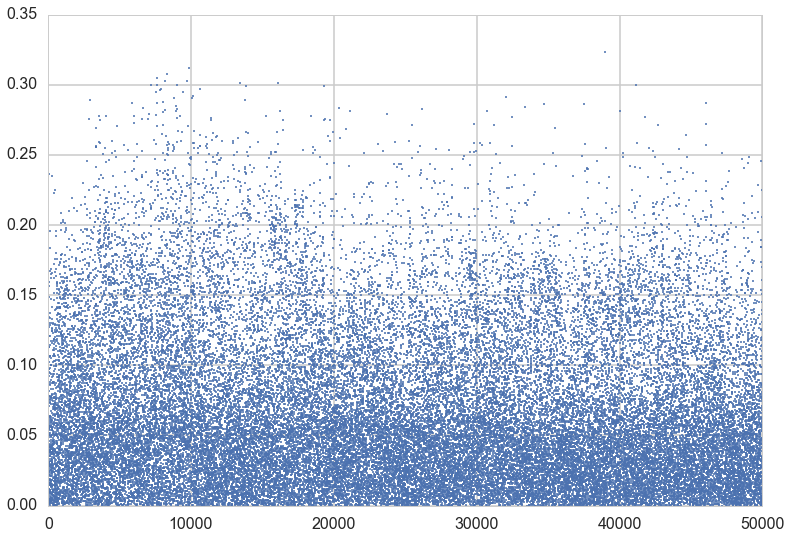

In [12]:
plt.plot(np.abs(corrs), '.', markersize=4, linestyle='None');

In [19]:
snp_cols = list(finaldf.columns[1:])

In [20]:
corrs = []
for i in snp_cols:
    corr = finaldf.loc[:, [i, 'fast']].corr(method="spearman") 
    corrs.append(corr.iloc[0,1])

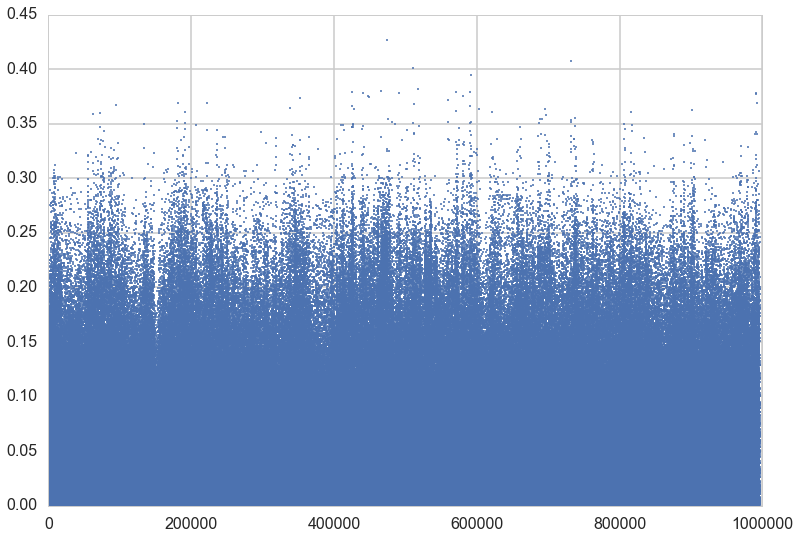

In [21]:
plt.plot(np.abs(corrs), '.', markersize=4, linestyle='None');

In [24]:
from scipy.stats import spearmanr

snp_cols = list(finaldf.columns[1:])

spearman_cor_dict = {}
p_val_dict = {}
neg_log_p_val_dict = {}
for snp in snp_cols:
    cor,p = spearmanr(list(finaldf['fast']),list(finaldf[snp]))
    spearman_cor_dict.update({snp:(cor)}) 
    p_val_dict.update({snp:(p)})
    pp = -np.log10(p)
    neg_log_p_val_dict.update({snp:(pp)})

In [25]:
stats_df=pd.DataFrame(spearman_cor_dict, index=['spearman_cor']).append(pd.DataFrame(p_val_dict, index=['p_vals'])).append(pd.DataFrame(neg_log_p_val_dict, index=['neg_log_p_vals']))
stats_df=stats_df.transpose()

new_names = []
for name in stats_df.index.values:
    i=0
    for c in name:
        i+=1
        if c=='_':
            upd_name=int(name[i:])
            break=
    new_names.append(upd_name)

stats_df.loc[:,'name']=(new_names)
stats_df.set_index('name',inplace=True)
stats_df.head()

,spearman_cor,p_vals,neg_log_p_vals
name,,,
10000022,0.087157,2.393699e-05,4.620930
10000106,0.078228,1.504078e-04,3.822730
10000160,-0.022167,2.834835e-01,0.547472
10000185,-0.006994,7.350719e-01,0.133670
10000302,0.142626,4.046472e-12,11.392923


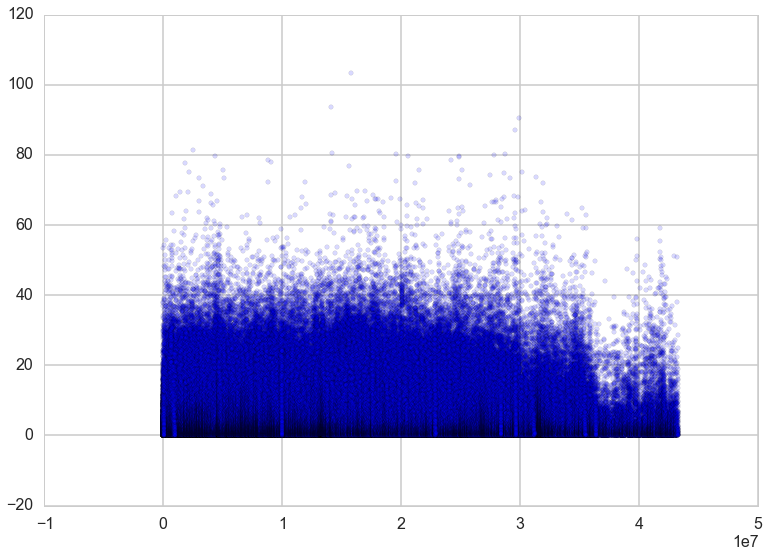

In [36]:
plt.scatter(stats_df.index.values,stats_df['neg_log_p_vals'],alpha=.15);

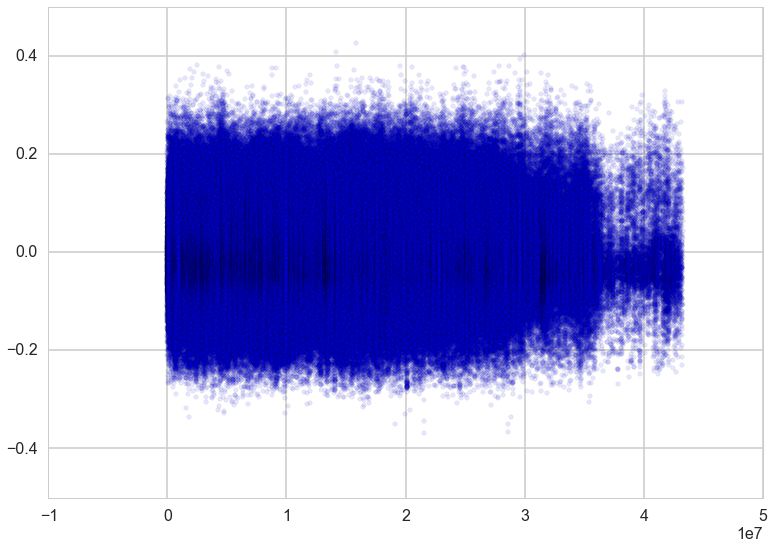

In [37]:
plt.scatter(stats_df.index.values,stats_df['spearman_cor'],alpha=.1);

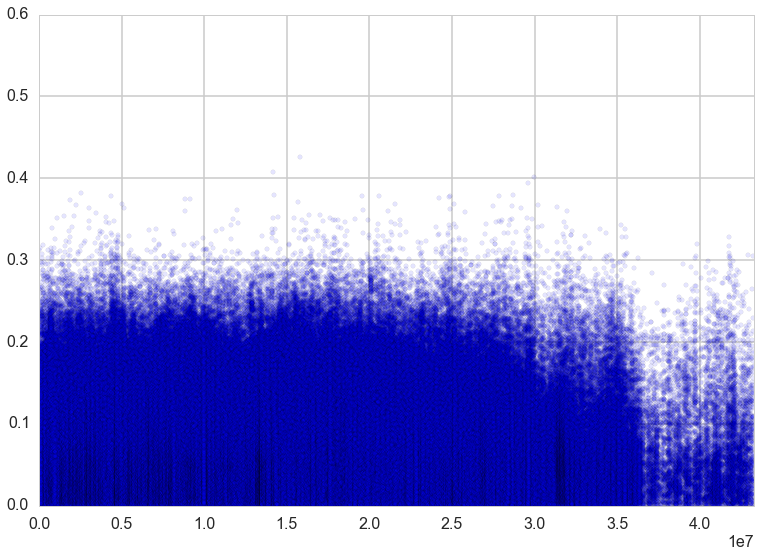

In [32]:
plt.scatter(stats_df.index.values,abs(stats_df['spearman_cor']),alpha=.1)
plt.axis([0,np.max(stats_df.index.values),0,.6]);

In [38]:
stats_df.to_csv('all_stats_df.csv')

In [ ]:
#do_analysis_df([finaldf])

snps 1
using mask

    snps 1
    using mask
    ############# based on standard predict ################
    Accuracy on training data: 0.85
    Accuracy on test data:     0.86
    [[602   0]
     [101   0]]
    ########################################################
    using mask
    ############# based on standard predict ################
    Accuracy on training data: 1.00
    Accuracy on test data:     0.90
    [[577  25]
     [ 47  54]]
    ########################################################
    LinearSVC(C=0.001, class_weight=None, dual=True, fit_intercept=True,
         intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
         penalty='l2', random_state=None, tol=0.0001, verbose=0) {'C': 0.001} 0.799390243902 [mean: 0.79939, std: 0.05104, params: {'C': 0.001}, mean: 0.79817, std: 0.04958, params: {'C': 0.01}, mean: 0.79817, std: 0.04958, params: {'C': 0.1}, mean: 0.79817, std: 0.04958, params: {'C': 1.0}, mean: 0.79817, std: 0.04958, params: {'C': 10.0}, mean: 0.79817, std: 0.04958, params: {'C': 100.0}]
    using reuse split
    ############# based on standard predict ################
    Accuracy on training data: 0.83
    Accuracy on test data:     0.85
    [[548  54]
     [ 49  52]]
    ########################################################
    
    snps 2
    using mask
    ############# based on standard predict ################
    Accuracy on training data: 0.85
    Accuracy on test data:     0.85
    [[595   0]
     [108   0]]
    ########################################################
    using mask
    ############# based on standard predict ################
    Accuracy on training data: 1.00
    Accuracy on test data:     0.86
    [[560  35]
     [ 64  44]]
    ########################################################
    LinearSVC(C=0.01, class_weight=None, dual=True, fit_intercept=True,
         intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
         penalty='l2', random_state=None, tol=0.0001, verbose=0) {'C': 0.01} 0.796341463415 [mean: 0.79573, std: 0.05726, params: {'C': 0.001}, mean: 0.79634, std: 0.05800, params: {'C': 0.01}, mean: 0.79634, std: 0.05800, params: {'C': 0.1}, mean: 0.79634, std: 0.05800, params: {'C': 1.0}, mean: 0.79634, std: 0.05800, params: {'C': 10.0}, mean: 0.79634, std: 0.05800, params: {'C': 100.0}]
    using reuse split
    ############# based on standard predict ################
    Accuracy on training data: 0.85
    Accuracy on test data:     0.85
    [[595   0]
     [108   0]]
    ########################################################
    
    snps 3
    using mask
    ############# based on standard predict ################
    Accuracy on training data: 0.85
    Accuracy on test data:     0.84
    [[592   0]
     [111   0]]
    ########################################################
    using mask
    ############# based on standard predict ################
    Accuracy on training data: 1.00
    Accuracy on test data:     0.86
    [[557  35]
     [ 62  49]]
    ########################################################
    LinearSVC(C=0.001, class_weight=None, dual=True, fit_intercept=True,
         intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
         penalty='l2', random_state=None, tol=0.0001, verbose=0) {'C': 0.001} 0.806097560976 [mean: 0.80610, std: 0.06609, params: {'C': 0.001}, mean: 0.80488, std: 0.06607, params: {'C': 0.01}, mean: 0.80488, std: 0.06607, params: {'C': 0.1}, mean: 0.80488, std: 0.06607, params: {'C': 1.0}, mean: 0.80488, std: 0.06607, params: {'C': 10.0}, mean: 0.80488, std: 0.06607, params: {'C': 100.0}]
    using reuse split
    ############# based on standard predict ################
    Accuracy on training data: 0.85
    Accuracy on test data:     0.84
    [[592   0]
     [111   0]]
    ########################################################
    
    snps 4
    using mask
    ############# based on standard predict ################
    Accuracy on training data: 0.85
    Accuracy on test data:     0.85
    [[597   0]
     [106   0]]
    ########################################################
    using mask
    ############# based on standard predict ################
    Accuracy on training data: 1.00
    Accuracy on test data:     0.86
    [[557  40]
     [ 58  48]]
    ########################################################
    LinearSVC(C=0.01, class_weight=None, dual=True, fit_intercept=True,
         intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
         penalty='l2', random_state=None, tol=0.0001, verbose=0) {'C': 0.01} 0.818292682927 [mean: 0.81585, std: 0.05092, params: {'C': 0.001}, mean: 0.81829, std: 0.05347, params: {'C': 0.01}, mean: 0.81829, std: 0.05347, params: {'C': 0.1}, mean: 0.81829, std: 0.05347, params: {'C': 1.0}, mean: 0.81829, std: 0.05347, params: {'C': 10.0}, mean: 0.81829, std: 0.05347, params: {'C': 100.0}]
    using reuse split
    ############# based on standard predict ################
    Accuracy on training data: 0.85
    Accuracy on test data:     0.85
    [[597   0]
     [106   0]]
    ########################################################
    
    snps 5
    using mask
    ############# based on standard predict ################
    Accuracy on training data: 0.86
    Accuracy on test data:     0.83
    [[585   0]
     [118   0]]
    ########################################################
    using mask
    ############# based on standard predict ################
    Accuracy on training data: 1.00
    Accuracy on test data:     0.85
    [[552  33]
     [ 73  45]]
    ########################################################
    LinearSVC(C=0.001, class_weight=None, dual=True, fit_intercept=True,
         intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
         penalty='l2', random_state=None, tol=0.0001, verbose=0) {'C': 0.001} 0.82256097561 [mean: 0.82256, std: 0.05687, params: {'C': 0.001}, mean: 0.81463, std: 0.05583, params: {'C': 0.01}, mean: 0.81463, std: 0.05583, params: {'C': 0.1}, mean: 0.81463, std: 0.05583, params: {'C': 1.0}, mean: 0.81463, std: 0.05583, params: {'C': 10.0}, mean: 0.81463, std: 0.05583, params: {'C': 100.0}]
    using reuse split
    ############# based on standard predict ################
    Accuracy on training data: 0.88
    Accuracy on test data:     0.83
    [[566  19]
     [ 98  20]]
    ########################################################
    
    snps 6
    using mask
    ############# based on standard predict ################
    Accuracy on training data: 0.85
    Accuracy on test data:     0.85
    [[598   0]
     [105   0]]
    ########################################################
    using mask
    ############# based on standard predict ################
    Accuracy on training data: 1.00
    Accuracy on test data:     0.87
    [[573  25]
     [ 68  37]]
    ########################################################
    LinearSVC(C=0.001, class_weight=None, dual=True, fit_intercept=True,
         intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
         penalty='l2', random_state=None, tol=0.0001, verbose=0) {'C': 0.001} 0.782317073171 [mean: 0.78232, std: 0.06552, params: {'C': 0.001}, mean: 0.78110, std: 0.06824, params: {'C': 0.01}, mean: 0.78110, std: 0.06824, params: {'C': 0.1}, mean: 0.78110, std: 0.06824, params: {'C': 1.0}, mean: 0.78110, std: 0.06824, params: {'C': 10.0}, mean: 0.78110, std: 0.06824, params: {'C': 100.0}]
    using reuse split
    ############# based on standard predict ################
    Accuracy on training data: 0.85
    Accuracy on test data:     0.85
    [[598   0]
     [105   0]]
    ########################################################
    
    snps 7
    using mask
    ############# based on standard predict ################
    Accuracy on training data: 0.85
    Accuracy on test data:     0.84
    [[590   0]
     [113   0]]
    ########################################################
    using mask
    ############# based on standard predict ################
    Accuracy on training data: 1.00
    Accuracy on test data:     0.86
    [[559  31]
     [ 65  48]]
    ########################################################
    LinearSVC(C=0.01, class_weight=None, dual=True, fit_intercept=True,
         intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
         penalty='l2', random_state=None, tol=0.0001, verbose=0) {'C': 0.01} 0.816463414634 [mean: 0.81585, std: 0.04601, params: {'C': 0.001}, mean: 0.81646, std: 0.04828, params: {'C': 0.01}, mean: 0.81646, std: 0.04828, params: {'C': 0.1}, mean: 0.81646, std: 0.04828, params: {'C': 1.0}, mean: 0.81646, std: 0.04828, params: {'C': 10.0}, mean: 0.81646, std: 0.04828, params: {'C': 100.0}]
    using reuse split
    ############# based on standard predict ################
    Accuracy on training data: 0.85
    Accuracy on test data:     0.84
    [[590   0]
     [113   0]]
    ########################################################
    
    snps 8
    using mask
    ############# based on standard predict ################
    Accuracy on training data: 0.84
    Accuracy on test data:     0.87
    [[610   0]
     [ 93   0]]
    ########################################################
    using mask
    ############# based on standard predict ################
    Accuracy on training data: 1.00
    Accuracy on test data:     0.87
    [[580  30]
     [ 61  32]]
    ########################################################
    LinearSVC(C=0.001, class_weight=None, dual=True, fit_intercept=True,
         intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
         penalty='l2', random_state=None, tol=0.0001, verbose=0) {'C': 0.001} 0.796341463415 [mean: 0.79634, std: 0.05843, params: {'C': 0.001}, mean: 0.79390, std: 0.05730, params: {'C': 0.01}, mean: 0.79390, std: 0.05730, params: {'C': 0.1}, mean: 0.79390, std: 0.05730, params: {'C': 1.0}, mean: 0.79390, std: 0.05730, params: {'C': 10.0}, mean: 0.79390, std: 0.05730, params: {'C': 100.0}]
    using reuse split
    ############# based on standard predict ################
    Accuracy on training data: 0.84
    Accuracy on test data:     0.87
    [[610   0]
     [ 93   0]]
    ########################################################
    
    snps 9
    using mask
    ############# based on standard predict ################
    Accuracy on training data: 0.85
    Accuracy on test data:     0.86
    [[602   0]
     [101   0]]
    ########################################################
    using mask
    ############# based on standard predict ################
    Accuracy on training data: 1.00
    Accuracy on test data:     0.89
    [[571  31]
     [ 48  53]]
    ########################################################
    LinearSVC(C=0.01, class_weight=None, dual=True, fit_intercept=True,
         intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
         penalty='l2', random_state=None, tol=0.0001, verbose=0) {'C': 0.01} 0.795731707317 [mean: 0.79207, std: 0.05024, params: {'C': 0.001}, mean: 0.79573, std: 0.05006, params: {'C': 0.01}, mean: 0.79573, std: 0.05006, params: {'C': 0.1}, mean: 0.79573, std: 0.05006, params: {'C': 1.0}, mean: 0.79573, std: 0.05006, params: {'C': 10.0}, mean: 0.79573, std: 0.05006, params: {'C': 100.0}]
    using reuse split
    ############# based on standard predict ################
    Accuracy on training data: 0.85
    Accuracy on test data:     0.86
    [[602   0]
     [101   0]]
    ########################################################
    
    snps 10
    using mask
    ############# based on standard predict ################
    Accuracy on training data: 0.85
    Accuracy on test data:     0.85
    [[600   0]
     [103   0]]
    ########################################################
    using mask
    ############# based on standard predict ################
    Accuracy on training data: 1.00
    Accuracy on test data:     0.88
    [[569  31]
     [ 56  47]]
    ########################################################
    LinearSVC(C=0.001, class_weight=None, dual=True, fit_intercept=True,
         intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
         penalty='l2', random_state=None, tol=0.0001, verbose=0) {'C': 0.001} 0.790853658537 [mean: 0.79085, std: 0.05225, params: {'C': 0.001}, mean: 0.79024, std: 0.05004, params: {'C': 0.01}, mean: 0.79024, std: 0.05004, params: {'C': 0.1}, mean: 0.79024, std: 0.05004, params: {'C': 1.0}, mean: 0.79024, std: 0.05004, params: {'C': 10.0}, mean: 0.79024, std: 0.05004, params: {'C': 100.0}]
    using reuse split
    ############# based on standard predict ################
    Accuracy on training data: 0.85
    Accuracy on test data:     0.85
    [[600   0]
     [103   0]]
    ########################################################
    
    snps 11
    using mask
    ############# based on standard predict ################
    Accuracy on training data: 0.85
    Accuracy on test data:     0.85
    [[600   0]
     [103   0]]
    ########################################################
    using mask
    ############# based on standard predict ################
    Accuracy on training data: 1.00
    Accuracy on test data:     0.87
    [[572  28]
     [ 61  42]]
    ########################################################
    LinearSVC(C=0.01, class_weight=None, dual=True, fit_intercept=True,
         intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
         penalty='l2', random_state=None, tol=0.0001, verbose=0) {'C': 0.01} 0.798780487805 [mean: 0.79451, std: 0.06507, params: {'C': 0.001}, mean: 0.79878, std: 0.06653, params: {'C': 0.01}, mean: 0.79878, std: 0.06653, params: {'C': 0.1}, mean: 0.79878, std: 0.06653, params: {'C': 1.0}, mean: 0.79878, std: 0.06653, params: {'C': 10.0}, mean: 0.79878, std: 0.06653, params: {'C': 100.0}]
    using reuse split
    ############# based on standard predict ################
    Accuracy on training data: 0.85
    Accuracy on test data:     0.85
    [[600   0]
     [103   0]]
    ########################################################
    
    snps 12
    using mask
    ############# based on standard predict ################
    Accuracy on training data: 0.85
    Accuracy on test data:     0.85
    [[600   0]
     [103   0]]
    ########################################################
    using mask
    ############# based on standard predict ################
    Accuracy on training data: 1.00
    Accuracy on test data:     0.86
    [[555  45]
     [ 53  50]]
    ########################################################
    LinearSVC(C=0.01, class_weight=None, dual=True, fit_intercept=True,
         intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
         penalty='l2', random_state=None, tol=0.0001, verbose=0) {'C': 0.01} 0.810365853659 [mean: 0.80976, std: 0.05545, params: {'C': 0.001}, mean: 0.81037, std: 0.05662, params: {'C': 0.01}, mean: 0.81037, std: 0.05662, params: {'C': 0.1}, mean: 0.81037, std: 0.05662, params: {'C': 1.0}, mean: 0.81037, std: 0.05662, params: {'C': 10.0}, mean: 0.81037, std: 0.05662, params: {'C': 100.0}]
    using reuse split
    ############# based on standard predict ################
    Accuracy on training data: 0.85
    Accuracy on test data:     0.85
    [[600   0]
     [103   0]]
    ########################################################
    
    snps 13
    using mask
    ############# based on standard predict ################
    Accuracy on training data: 0.85
    Accuracy on test data:     0.85
    [[596   0]
     [107   0]]
    ########################################################
    using mask
    ############# based on standard predict ################
    Accuracy on training data: 1.00
    Accuracy on test data:     0.87
    [[564  32]
     [ 59  48]]
    ########################################################
    LinearSVC(C=0.001, class_weight=None, dual=True, fit_intercept=True,
         intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
         penalty='l2', random_state=None, tol=0.0001, verbose=0) {'C': 0.001} 0.808536585366 [mean: 0.80854, std: 0.04830, params: {'C': 0.001}, mean: 0.80793, std: 0.05322, params: {'C': 0.01}, mean: 0.80793, std: 0.05322, params: {'C': 0.1}, mean: 0.80793, std: 0.05322, params: {'C': 1.0}, mean: 0.80793, std: 0.05322, params: {'C': 10.0}, mean: 0.80793, std: 0.05322, params: {'C': 100.0}]
    using reuse split
    ############# based on standard predict ################
    Accuracy on training data: 0.85
    Accuracy on test data:     0.85
    [[596   0]
     [107   0]]
    ########################################################
    
    snps 14
    using mask
    ############# based on standard predict ################
    Accuracy on training data: 0.84
    Accuracy on test data:     0.88
    [[616   0]
     [ 87   0]]
    ########################################################
    using mask
    ############# based on standard predict ################
    Accuracy on training data: 1.00
    Accuracy on test data:     0.88
    [[585  31]
     [ 54  33]]
    ########################################################
    LinearSVC(C=0.001, class_weight=None, dual=True, fit_intercept=True,
         intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
         penalty='l2', random_state=None, tol=0.0001, verbose=0) {'C': 0.001} 0.776219512195 [mean: 0.77622, std: 0.06963, params: {'C': 0.001}, mean: 0.77073, std: 0.06534, params: {'C': 0.01}, mean: 0.77073, std: 0.06534, params: {'C': 0.1}, mean: 0.77073, std: 0.06534, params: {'C': 1.0}, mean: 0.77073, std: 0.06534, params: {'C': 10.0}, mean: 0.77073, std: 0.06534, params: {'C': 100.0}]
    using reuse split
    ############# based on standard predict ################
    Accuracy on training data: 0.84
    Accuracy on test data:     0.88
    [[616   0]
     [ 87   0]]
    ########################################################
    
    snps 15
    using mask
    ############# based on standard predict ################
    Accuracy on training data: 0.85
    Accuracy on test data:     0.85
    [[599   0]
     [104   0]]
    ########################################################
    using mask
    ############# based on standard predict ################
    Accuracy on training data: 1.00
    Accuracy on test data:     0.86
    [[559  40]
     [ 60  44]]
    ########################################################
    LinearSVC(C=0.001, class_weight=None, dual=True, fit_intercept=True,
         intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
         penalty='l2', random_state=None, tol=0.0001, verbose=0) {'C': 0.001} 0.787804878049 [mean: 0.78780, std: 0.06997, params: {'C': 0.001}, mean: 0.78415, std: 0.06799, params: {'C': 0.01}, mean: 0.78415, std: 0.06799, params: {'C': 0.1}, mean: 0.78415, std: 0.06799, params: {'C': 1.0}, mean: 0.78415, std: 0.06799, params: {'C': 10.0}, mean: 0.78415, std: 0.06799, params: {'C': 100.0}]
    using reuse split
    ############# based on standard predict ################
    Accuracy on training data: 0.85
    Accuracy on test data:     0.85
    [[599   0]
     [104   0]]
    ########################################################
    
    snps 16
    using mask
    ############# based on standard predict ################
    Accuracy on training data: 0.85
    Accuracy on test data:     0.84
    [[589   0]
     [114   0]]
    ########################################################
    using mask
    ############# based on standard predict ################
    Accuracy on training data: 1.00
    Accuracy on test data:     0.86
    [[556  33]
     [ 67  47]]
    ########################################################
    LinearSVC(C=0.01, class_weight=None, dual=True, fit_intercept=True,
         intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
         penalty='l2', random_state=None, tol=0.0001, verbose=0) {'C': 0.01} 0.821341463415 [mean: 0.81890, std: 0.04598, params: {'C': 0.001}, mean: 0.82134, std: 0.05008, params: {'C': 0.01}, mean: 0.82134, std: 0.05008, params: {'C': 0.1}, mean: 0.82134, std: 0.05008, params: {'C': 1.0}, mean: 0.82134, std: 0.05008, params: {'C': 10.0}, mean: 0.82134, std: 0.05008, params: {'C': 100.0}]
    using reuse split
    ############# based on standard predict ################
    Accuracy on training data: 0.85
    Accuracy on test data:     0.84
    [[589   0]
     [114   0]]
    ########################################################
    
    snps 17
    using mask
    ############# based on standard predict ################
    Accuracy on training data: 0.85
    Accuracy on test data:     0.85
    [[599   0]
     [104   0]]
    ########################################################
    using mask
    ############# based on standard predict ################
    Accuracy on training data: 1.00
    Accuracy on test data:     0.89
    [[577  22]
     [ 58  46]]
    ########################################################
    LinearSVC(C=0.001, class_weight=None, dual=True, fit_intercept=True,
         intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
         penalty='l2', random_state=None, tol=0.0001, verbose=0) {'C': 0.001} 0.785365853659 [mean: 0.78537, std: 0.07928, params: {'C': 0.001}, mean: 0.78537, std: 0.08049, params: {'C': 0.01}, mean: 0.78537, std: 0.08049, params: {'C': 0.1}, mean: 0.78537, std: 0.08049, params: {'C': 1.0}, mean: 0.78537, std: 0.08049, params: {'C': 10.0}, mean: 0.78537, std: 0.08049, params: {'C': 100.0}]
    using reuse split
    ############# based on standard predict ################
    Accuracy on training data: 0.85
    Accuracy on test data:     0.85
    [[599   0]
     [104   0]]
    ########################################################
    
    snps 18
    using mask
    ############# based on standard predict ################
    Accuracy on training data: 0.84
    Accuracy on test data:     0.87
    [[615   0]
     [ 88   0]]
    ########################################################
    using mask
    ############# based on standard predict ################
    Accuracy on training data: 1.00
    Accuracy on test data:     0.89
    [[588  27]
     [ 49  39]]
    ########################################################
    LinearSVC(C=0.01, class_weight=None, dual=True, fit_intercept=True,
         intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
         penalty='l2', random_state=None, tol=0.0001, verbose=0) {'C': 0.01} 0.765243902439 [mean: 0.76402, std: 0.05819, params: {'C': 0.001}, mean: 0.76524, std: 0.05911, params: {'C': 0.01}, mean: 0.76524, std: 0.05911, params: {'C': 0.1}, mean: 0.76524, std: 0.05911, params: {'C': 1.0}, mean: 0.76524, std: 0.05911, params: {'C': 10.0}, mean: 0.76524, std: 0.05911, params: {'C': 100.0}]
    using reuse split
    ############# based on standard predict ################
    Accuracy on training data: 0.84
    Accuracy on test data:     0.87
    [[615   0]
     [ 88   0]]
    ########################################################
    
    snps 19
    using mask
    ############# based on standard predict ################
    Accuracy on training data: 0.85
    Accuracy on test data:     0.85
    [[595   0]
     [108   0]]
    ########################################################
    using mask
    ############# based on standard predict ################
    Accuracy on training data: 1.00
    Accuracy on test data:     0.86
    [[557  38]
     [ 62  46]]
    ########################################################
    LinearSVC(C=0.01, class_weight=None, dual=True, fit_intercept=True,
         intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
         penalty='l2', random_state=None, tol=0.0001, verbose=0) {'C': 0.01} 0.786585365854 [mean: 0.78476, std: 0.07214, params: {'C': 0.001}, mean: 0.78659, std: 0.07204, params: {'C': 0.01}, mean: 0.78659, std: 0.07204, params: {'C': 0.1}, mean: 0.78659, std: 0.07204, params: {'C': 1.0}, mean: 0.78659, std: 0.07204, params: {'C': 10.0}, mean: 0.78659, std: 0.07204, params: {'C': 100.0}]
    using reuse split
    ############# based on standard predict ################
    Accuracy on training data: 0.85
    Accuracy on test data:     0.85
    [[595   0]
     [108   0]]
    ########################################################
    
    snps 20
    using mask
    ############# based on standard predict ################
    Accuracy on training data: 0.84
    Accuracy on test data:     0.87
    [[609   0]
     [ 94   0]]
    ########################################################
    using mask
    ############# based on standard predict ################
    Accuracy on training data: 1.00
    Accuracy on test data:     0.88
    [[575  34]
     [ 47  47]]
    ########################################################
    LinearSVC(C=0.001, class_weight=None, dual=True, fit_intercept=True,
         intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
         penalty='l2', random_state=None, tol=0.0001, verbose=0) {'C': 0.001} 0.791463414634 [mean: 0.79146, std: 0.05793, params: {'C': 0.001}, mean: 0.79024, std: 0.05853, params: {'C': 0.01}, mean: 0.79024, std: 0.05853, params: {'C': 0.1}, mean: 0.79024, std: 0.05853, params: {'C': 1.0}, mean: 0.79024, std: 0.05853, params: {'C': 10.0}, mean: 0.79024, std: 0.05853, params: {'C': 100.0}]
    using reuse split
    ############# based on standard predict ################
    Accuracy on training data: 0.84
    Accuracy on test data:     0.87
    [[609   0]
     [ 94   0]]
    ########################################################

In [ ]:
def get_coeficcients(df_names):
    counter=0
    coef_dict={}
    for df_name in df_names:
        counter+=1
        
        print ('snps '+str(counter))
        
        merged_df=pd.read_csv(df_name, index_col=0)
        
        lcols=list(merged_df)
        lcols.remove('fast')
        
        itrain, itest = train_test_split(xrange(merged_df.shape[0]), train_size=0.7)
        mask=np.ones(merged_df.shape[0], dtype='int')
        mask[itrain]=1
        mask[itest]=0
        mask = (mask==1)
        mask.shape, mask.sum()
        
        clfsvm_final, Xtrain, ytrain, Xtest, ytest = do_classify(LinearSVC(loss="hinge"), {"C": [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]}, merged_df,lcols, 'fast',1, mask=mask)
        
    return coef_dict

In [ ]:
#do the fit

In [8]:
coefs_df=pd.read_csv('coefs_df.csv')

In [9]:
coefs_df.head()

,name,coefficient
0,10000022,-0.001461
1,10000106,0.006966
2,10000160,-0.001800
3,10000185,-0.000594
4,10000302,0.001894


In [10]:
coefs_df['abscoef']=abs(coefs_df['coefficient'])

In [11]:
coefs_df.head()

,name,coefficient,abscoef
0,10000022,-0.001461,0.001461
1,10000106,0.006966,0.006966
2,10000160,-0.001800,0.001800
3,10000185,-0.000594,0.000594
4,10000302,0.001894,0.001894


In [12]:
coefs_df.sort(columns=['abscoef'],ascending=False, inplace=True)

In [13]:
coefs_df.reset_index(drop=True, inplace=True)

In [14]:
coefs_df.name.values

array([23984288,  5126366, 10541629, ...,  8589728, 42176813, 19596825])

In [15]:
best_snps=coefs_df.ix[:49999]

In [16]:
best_snps.shape

(50000, 3)

In [17]:
best_ids=(best_snps.name.values)

In [ ]:
new_names = []
for name in finaldf.index.values:
    i=0
    for c in name:
        i+=1
        if c=='_':
            upd_name=int(name[i:])
            new_names.append(upd_name)
            break
    
finaldf.loc[:,'location']=(new_names)
finaldf.set_index('location',drop=True,inplace=True)
finaldf.head()

In [34]:
print type(best_ids)

<type 'numpy.ndarray'>


In [71]:
def get_best_snps(dfs,best_snps):
    counter=0

    for df_name in dfs:
        
        merged_df=pd.read_csv(df_name, index_col=0)
        if counter ==0:
            finaldf=pd.DataFrame(index=list(merged_df.index))
            print finaldf.shape
            finaldf=finaldf.transpose()
                        
        print ('snps '+str(counter))
        counter+=1
        merged_df=merged_df.transpose()
        new_names = ['fast']
        for name in merged_df.index.values:
            i=0
            for c in name:
                i+=1
                if c=='_':
                    upd_name=int(name[i:])
                    new_names.append(upd_name)
                    break

        merged_df.loc[:,'location']=(new_names)
        new_names.remove('fast')
        common_snps=np.intersect1d(new_names, best_snps)
#         #print merged_df['location'].values.isin(common_snps)
#         df=merged_df.loc[merged_df['location'].isin(common_snps)]
        merged_df.set_index('location',drop=True,inplace=True)
#         #print df.head()
        print common_snps
        print merged_df.index.values
        common_snps=map(int, common_snps)
        if counter == 1:
            finaldf=finaldf.append(merged_df.loc['fast'])
        for snp in common_snps:
            if snp in merged_df.index.values:
                finaldf=finaldf.append(merged_df.loc[snp])
#         finaldf=finaldf.append(df)
        print finaldf.shape
    finaldf=finaldf.transpose()
    return finaldf

In [72]:
best_df=get_best_snps(dfs, best_ids)

(2343, 0)
snps 0
[    1299    17263    31071 ..., 20870277 20872151 20872592]
['rest' 1203 1248 ..., 20876585 20877079 20877082]
(2030, 2343)
snps 1
[    3303    27450    55955 ..., 43250373 43253309 43269364]
['rest' 20877425 20880696 ..., 5069363 5074287 5077850]
(4599, 2343)
snps 2
[ 5078060  5086388  5093637 ..., 24217698 24218595 24219489]
['rest' 5078060 5078251 ..., 24219665 24219754 24219999]
(7369, 2343)
snps 3
[   32605   149422   176180 ..., 35903987 35905222 35919114]
['rest' 24220022 24220073 ..., 15066961 15067290 15067327]
(9294, 2343)
snps 4
[    1568     8331     9811 ..., 36391323 36408080 36410217]
['rest' 15067354 15067826 ..., 110027 110613 110820]
(12212, 2343)
snps 5
[  111733   124528   128951 ..., 12474272 12522174 12522522]
['rest' 110930 111051 ..., 12556754 12557111 12557172]
(14670, 2343)
snps 6
[    4373     7297    17151 ..., 35500887 35501001 35501005]
['rest' 12563918 12564365 ..., 822528 822585 822789]
(17269, 2343)
snps 7
[  822918   824070   824098 .

In [73]:
best_df.to_csv('best_df.csv')

In [78]:
best_df.drop(['rest'], axis=1, inplace=True)

In [80]:
merged_df=pd.read_csv('../finally1.csv', index_col=0)

In [84]:
merged_df.head()

,fast,1_1203,1_1248,1_1282,1_1299,1_1787,1_1977,1_2097,1_2245,1_6634,1_11241,1_11297,1_11334,1_11664,1_11835,1_12127,1_13894,1_16737,1_17263,1_21546,1_25777,1_26602,1_27188,1_28781,1_31071,1_34721,1_34729,1_35239,1_35405,1_37676,1_41342,1_42752,1_44681,1_44754,1_44787,1_44826,1_45212,1_46705,1_47171,1_47628,1_47674,1_48241,1_48318,1_48321,1_48402,1_48404,1_48494,1_48633,1_48645,1_48659,...,1_20869183,1_20869913,1_20869917,1_20869919,1_20869932,1_20869944,1_20869953,1_20870013,1_20870016,1_20870056,1_20870240,1_20870277,1_20870286,1_20870301,1_20870393,1_20870443,1_20870445,1_20870516,1_20870526,1_20870734,1_20870820,1_20870906,1_20871034,1_20871251,1_20871328,1_20871330,1_20871400,1_20871438,1_20871446,1_20871479,1_20871594,1_20871619,1_20871926,1_20872038,1_20872049,1_20872151,1_20872373,1_20872408,1_20872419,1_20872473,1_20872507,1_20872544,1_20872579,1_20872592,1_20872593,1_20875310,1_20876423,1_20876585,1_20877079,1_20877082
DNA_UNIQUE_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
IRIS 313-9783,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,1,1,0,1,1,1,0,0,0,1,2,0,2,0,0,0,0,0,0
IRIS 313-10509,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,...,0,2,0,1,2,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,1,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0,2,0,0,0,0,0,0,0
IRIS 313-9778,0,2,0,0,2,0,0,0,0,0,0,0,2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,1,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,1,1,1,1,1,0,0,0,0,1,1,1,0,0,0,2,0,0
IRIS 313-9980,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,1,0,0,0,0,1,0,2,1,0,0,0,0,0
IRIS 313-9795,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,2,0,0,1,0,1,0,1,1,0,0,0,0,0,0,0,1,0,1,1,0,0,1,0,1,0,0,1,0,1,1,1,1,0,0,0,1,0,2,0,0,0,0,0,0,0


In [82]:
best_df['fast']=merged_df['fast']

In [83]:
best_df.head()

,1299,17263,31071,51915,78432,96668,104992,130112,137002,150920,158691,159216,161393,163529,169101,174554,175973,176029,183691,189500,214481,222046,232437,234451,248047,248062,248066,248071,248138,254965,259763,294262,382831,382973,410332,413343,414092,436046,444350,446709,466051,466791,469444,470180,489973,492227,492302,492334,525714,531567,...,27107205,27117059,27117090,27120548,27122708,27134986,27135854,27139815,27140269,27142721,27143339,27145386,27158188,27163741,27167783,27177697,27177852,27179303,27210338,27215791,27256384,27259302,27259311,27296874,27300241,27305763,27329503,27337900,27338563,27348474,27357710,27361985,27362337,27362747,27367467,27367994,27369966,27371603,27371713,27372035,27388462,27406785,27411861,27434018,27448275,27494939,27509303,27511900,27524481,fast
IRIS 313-9783,1,0,0,0,0,1,1,0,2,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,2,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,...,0,2,0,0,0,0,0,1,1,0,1,2,1,2,0,0,0,2,0,0,0,0,0,0,0,0,2,2,0,2,0,0,0,0,0,2,0,0,2,0,2,0,0,0,2,2,0,0,2,0
IRIS 313-10509,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,1,2,0,1,0,0,1,2,0,1,2,0,0,0,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,2,0,0,0,2,2,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0
IRIS 313-9778,2,0,0,1,1,0,2,0,2,0,0,0,0,0,0,2,0,2,0,2,1,0,0,0,0,0,0,0,0,2,0,0,2,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,2,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
IRIS 313-9980,0,0,2,0,0,0,1,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,1,0,0,0,2,0,2,0,0,2,2,2,0,0,0,0,0,2,0,2,2,0,2,0,0,0,0,0,0,0,0,2,0,2,0,2,2,2,2,2,0,2,0
IRIS 313-9795,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,1,0,0,0,0,0,1,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,...,2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,2,1,0,0,2,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [97]:
len(np.unique(best_df.columns.values))

49969

In [101]:
hiiii = best_df.T.groupby(level=0).first().T

In [106]:
hiiii.to_csv('best_df_updated.csv')

In [102]:
hiiii.head()

,1299,1368,1568,2013,2050,2256,2292,2323,2444,2493,2536,2543,2587,2753,2878,2986,3303,4373,4845,5728,5911,6600,7297,8042,8331,9811,11258,11306,11705,12875,12933,13443,13792,14135,14188,14933,15331,15357,15754,15771,17151,17263,19054,20004,21584,21647,22044,22201,23533,24247,...,42689792,42699449,42704699,42705788,42727292,42736972,42743674,42745535,42755509,42770886,42817082,42832297,42833213,42833511,42833776,42870274,42875418,42881241,42885470,42903515,42920312,42920472,42925987,42944050,42982700,43015727,43016353,43018330,43022748,43052845,43052846,43052847,43066650,43071297,43071318,43081842,43088709,43103625,43103699,43103819,43137488,43158840,43174539,43184785,43220082,43238763,43250373,43253309,43269364,fast
IRIS 313-9783,1,1,0,2,2,1,1,0,1,1,0,1,0,1,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,2,0,2,0,0,0,0,2,2,2,0,0,0,1,1,1,1,0,2,1,1,0,2,0,0,0,0,2,0,2,2,0,0,0
IRIS 313-10509,0,1,0,1,0,0,1,1,1,1,0,1,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0,1,0,1,0,1,0,0,1,...,0,2,0,0,0,0,2,0,2,0,0,1,0,0,0,0,0,0,0,0,2,0,0,0,0,0,2,0,1,0,2,2,1,0,0,0,1,0,0,2,0,0,0,0,0,0,0,1,0,0
IRIS 313-9778,2,2,0,1,0,0,2,0,0,0,0,1,2,0,0,0,0,0,0,0,0,0,0,0,2,2,0,0,0,1,0,0,1,1,0,1,0,0,1,0,0,0,1,0,1,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,2,0,2,0,0,0,0,2,0,0,0,1,1,1,2,0,2,1,2,0,2,0,0,0,0,2,0,1,2,1,0,0
IRIS 313-9980,0,0,0,2,2,0,0,2,2,2,0,0,0,0,0,0,0,0,0,2,2,0,2,0,0,2,0,1,0,0,0,2,1,0,0,0,0,0,2,0,0,0,1,0,1,1,0,0,0,0,...,0,0,0,1,2,0,0,0,1,0,0,0,0,0,0,0,2,0,2,0,0,0,0,2,2,0,0,0,0,2,0,0,1,0,2,0,2,0,2,0,0,0,0,2,0,0,2,0,0,0
IRIS 313-9795,0,2,0,0,0,0,2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,...,0,0,0,2,0,0,2,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,1,0,1,1,1,0,0,0,2,0,0,0,1,0,0,2,1,0,0,1,0,0


In [104]:
def get_coeficcients_df(merged_df):
    lcols=list(merged_df)
    lcols.remove('fast')

    itrain, itest = train_test_split(xrange(merged_df.shape[0]), train_size=0.7)
    mask=np.ones(merged_df.shape[0], dtype='int')
    mask[itrain]=1
    mask[itest]=0
    mask = (mask==1)
    mask.shape, mask.sum()

    clfsvm_final, Xtrain, ytrain, Xtest, ytest = do_classify(LinearSVC(loss="hinge"), {"C": [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]}, merged_df,lcols, 'fast',1, mask=mask)
    coefs=dict(zip(merged_df.columns.values[1:],clfsvm_final.coef_[0]))
    predictions=clfsvm_final.predict(Xtest)
    return coefs,clfsvm_final,predictions,mask

In [105]:
best_coefs,clfsvm_final,predictions,mask=get_coeficcients_df(hiiii)

using mask
############# based on standard predict ################
Accuracy on training data: 1.0000
Accuracy on test data:     0.9630
[[585   9]
 [ 17  92]]
########################################################


/Users/oneil/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:6: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
